In [7]:
>>> from sklearn.datasets import fetch_openml
>>> mnist = fetch_openml('mnist_784', version=1)
>>> mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [49]:
X,y = mnist['data'],mnist['target']

In [50]:
X.shape

(70000, 784)

In [51]:
y.shape

(70000,)

In [52]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

<function matplotlib.pyplot.show(*args, **kw)>

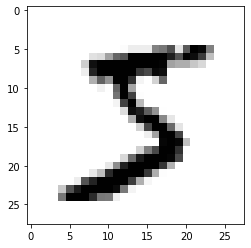

In [53]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap='binary')
plt.show

In [54]:
y[0]

'5'

In [55]:
y= y.astype(np.uint8)

In [56]:
X_train, X_test, y_train, y_test =  X[:60000], X[60000:],y[:60000], y[60000:]

<h1> Training a binary Classifier</h1>
<p>We will create a binary classifier capable of distinguishing between two classes 5 or ~5</p>

In [57]:
y_train_5 = (y_train == 5)

y_test_5 = (y_test == 5)


In [58]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [59]:
sgd_clf.predict([some_digit])

array([ True])

In [60]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv =3, scoring ='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [65]:
from sklearn.base import BaseEstimator
#predicts every number is not a 5 
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [67]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
#since only 10% of data images as 5 ,predicting every number isnt a 5 gives us 90% accuracy so using 'accuracy' isnt a good performance measure

array([0.91125, 0.90855, 0.90915])

<h1>Confusion Matrix</h1>

In [76]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf , X_train, y_train_5 ,cv = 3)

In [77]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [82]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

print(precision_score(y_train_5, y_train_pred))

print(recall_score(y_train_5, y_train_pred))

print(f1_score(y_train_5, y_train_pred))

print(accuracy_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311
0.7325171197343846
0.9570333333333333


In [83]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [84]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [85]:
y_some_digit_pred

array([ True])

In [86]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)

In [87]:
y_some_digit_pred

array([False])

In [91]:
y_scores  =  cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method = "decision_function")


In [92]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

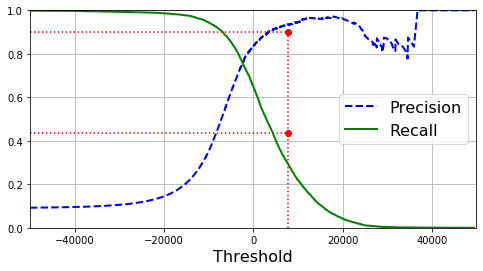

In [97]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown

plt.figure(figsize=(8, 4))                      # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([7813, 7813], [0., 0.9], "r:")         # Not shown
plt.plot([-50000, 7813], [0.9, 0.9], "r:")      # Not shown
plt.plot([-50000, 7813], [0.4368, 0.4368], "r:")# Not shown
plt.plot([7813], [0.9], "ro")                   # Not shown
plt.plot([7813], [0.4368], "ro")                # Not shown
#save_fig("precision_recall_vs_threshold_plot")  # Not shown
plt.show()



In [98]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [107]:
threshold_90_precision

3370.0194991439557

In [108]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [109]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [110]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

<h1>ROC Curve</h1>

In [111]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

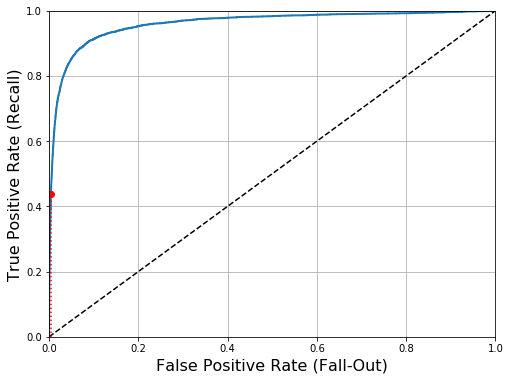

In [122]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
#save_fig("roc_curve_plot")                         # Not shown
plt.show()



In [124]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [127]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

/home/ritwik/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [130]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [128]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

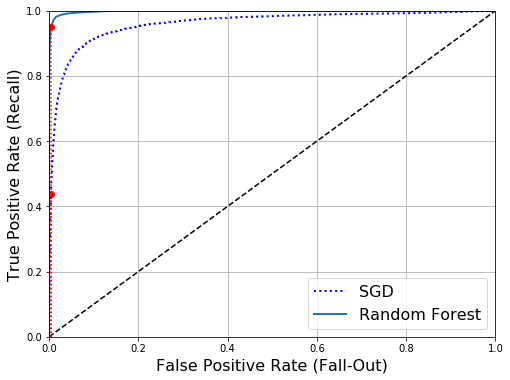

In [136]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
# save_fig("roc_curve_comparison_plot")
plt.show()

In [137]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [138]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [139]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591